In [1]:
from dmipy.signal_models import sphere_models, cylinder_models, gaussian_models
from dmipy.core.modeling_framework import MultiCompartmentModel, MultiCompartmentSphericalHarmonicsModel
import numpy as np
from scipy.stats import rice
import matplotlib as mpl
import matplotlib.gridspec as gridspec


sphere = sphere_models.S4SphereGaussianPhaseApproximation(diffusion_constant=1.2e-9)
ball = gaussian_models.G1Ball()
stick = cylinder_models.C1Stick()

verdict_mod = MultiCompartmentModel(models=[sphere, ball, stick])

verdict_mod.set_fixed_parameter('G1Ball_1_lambda_iso', 2e-9) #2
verdict_mod.set_parameter_optimization_bounds('C1Stick_1_lambda_par', [3.05e-9, 10e-9])
verdict_mod.parameter_names
verdict_mod.parameter_cardinality

OrderedDict([('S4SphereGaussianPhaseApproximation_1_diameter', 1),
             ('C1Stick_1_mu', 2),
             ('C1Stick_1_lambda_par', 1),
             ('partial_volume_0', 1),
             ('partial_volume_1', 1),
             ('partial_volume_2', 1)])

In [2]:
from dmipy.core.acquisition_scheme import acquisition_scheme_from_schemefile
from os.path import join

acquisition_path_GS55 = "/Users/theavage/Documents/Master/Data/GS55 - long acquisition"

scheme= acquisition_scheme_from_schemefile("new.scheme")

In [3]:
def all_comb(ic,ec,vasc,radi):

    comb= []

    for i in ic:
        for j in ec:
            for k in vasc:
                if i+j+k == 1:
                    for r in radi:
                        comb.append([r,2,1,3.05000000e-09,i,j,k])
    return comb

In [4]:
def fill(comb_arr,pixels):

    for i in range(pixels):
        comb_arr.append([np.random.uniform(0.001e-6,0.002e-6),2, 1, 3.05e-09,0.33,0.33,0.33])
    
    return comb_arr

In [5]:
#Creating parameter vector

ranges = np.arange(0.1,1.1,0.1)
ic = ranges; ec = ranges; vasc = ranges
radi = np.arange(0.02e-6,30e-6,1e-6)

all_combinations = all_comb(ic,ec,vasc,radi)

final = fill(all_combinations,4)

parameter_vector = np.array(final).reshape(32,32,7)

In [6]:
simulated_signal = verdict_mod.simulate_signal(scheme,parameter_vector)


/Users/theavage/opt/anaconda3/lib/python3.9/site-packages/dmipy/signal_models/sphere_models.py:317: RuntimeWarning: overflow encountered in exp
  np.exp(-alpha2D * (Delta - delta)) -
/Users/theavage/opt/anaconda3/lib/python3.9/site-packages/dmipy/signal_models/sphere_models.py:317: RuntimeWarning: overflow encountered in exp
  np.exp(-alpha2D * (Delta - delta)) -
/Users/theavage/opt/anaconda3/lib/python3.9/site-packages/dmipy/signal_models/sphere_models.py:324: RuntimeWarning: overflow encountered in exp
  E = np.exp(


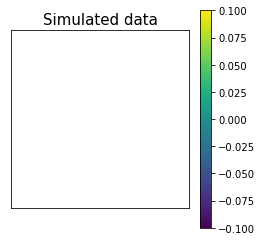

In [22]:
import matplotlib.pyplot as plt
#Visualization of simulated signal
fig, ax = plt.subplots(1,figsize=(4,4))

image = ax.imshow(simulated_signal[:,:,155000])
title = ax.set_title('Simulated data',fontsize=15)
cb = fig.colorbar(image,ax=ax)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [23]:
simulated_signal[:,:,50000]

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])